## Proje 1-Titanic Exploratory Data Analysis

1.Setting a Research Question

2.General View of the Data

3.Data Cleaning

4.Exploring the Data

5.Feature Engineering

6.Results



### 1. Setting a Research Question


The question we are trying to answer is to find out and investigate what types of traits affect their survival probability for titanic passengers.Let's start the analysis .

### 2.General View of the Data

#### Variables

Survived: 0 = No, 1 = Yes

Age: passenger age

Pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic

Ticket: Ticket number

Cabin: Cabin number

Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#### Importing the useful libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import missingno as msno
import scipy.stats as stats
from sklearn import preprocessing
import warnings
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

#### load train, test dataset using Pandas

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
test_df = pd.read_csv("test.csv")

In [4]:
titanic = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Total rows and columns

We can see that there are 1309 rows and 12 columns in our training dataset.

In [7]:
titanic.shape

(1309, 12)

Some statistically meaningful values about data:

In [8]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [9]:
titanic.describe(include=["O"]).T

,count,unique,top,freq
Name,1309,1307,"Kelly, Mr. James",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914


 Target Variable : "Survived"

In [10]:
titanic.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [11]:
s = (train_df["Survived"]==1).sum()/len(train_df)*100
print("Survival Rate: %{:.3f}".format(s))

Survival Rate: %38.384


### 3.Data Cleaning

In [12]:
titanic.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
titanic.columns[titanic.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

There are 263 rows with missing Age, 1014 rows with missing Cabin ,1 row with missing Fare and 2 rows with missing Embarked information.

#### Examining missing percentages and numbers

As can be seen, 77% of the "Cabin" variable is missing.
20% of the "Age" variable is missing.

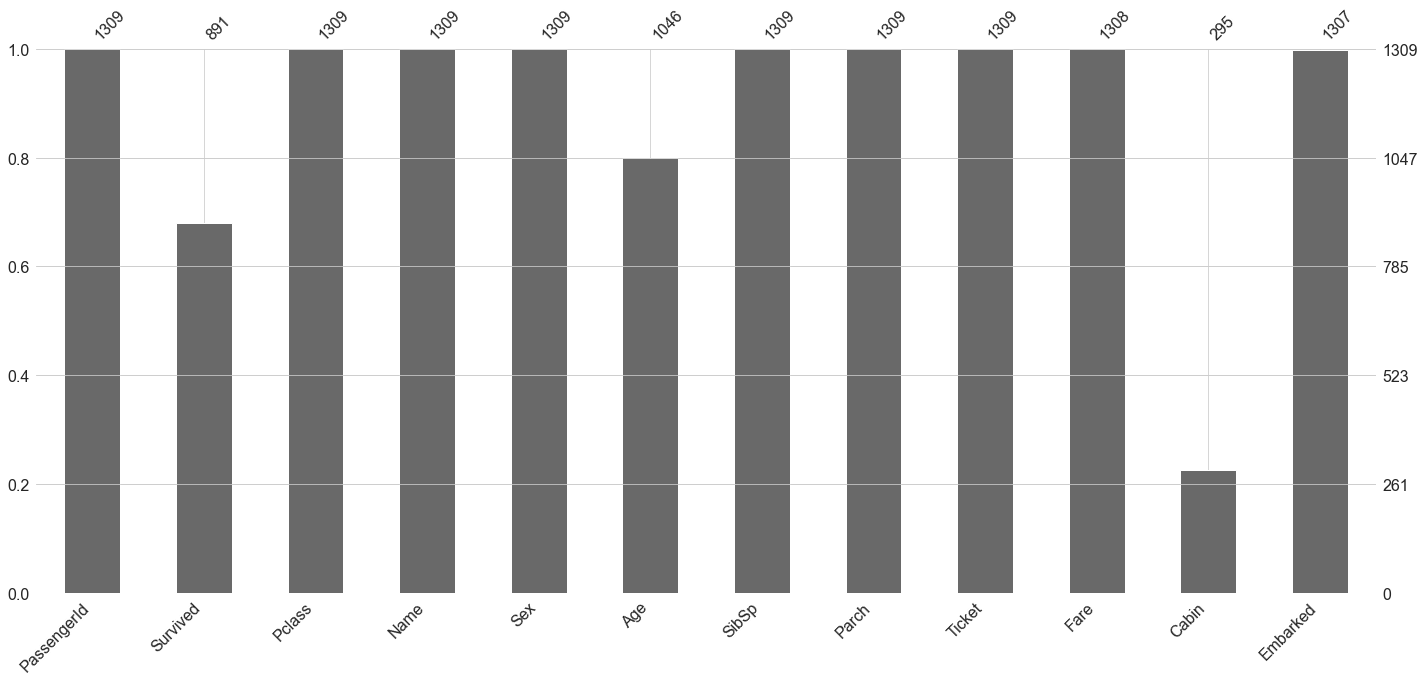

In [14]:
msno.bar(titanic)  
plt.show()

We can see that missing values in the cabin variable do not affect the target variable and other variables. We can also delete the cabin column because the number of missing values is too large.

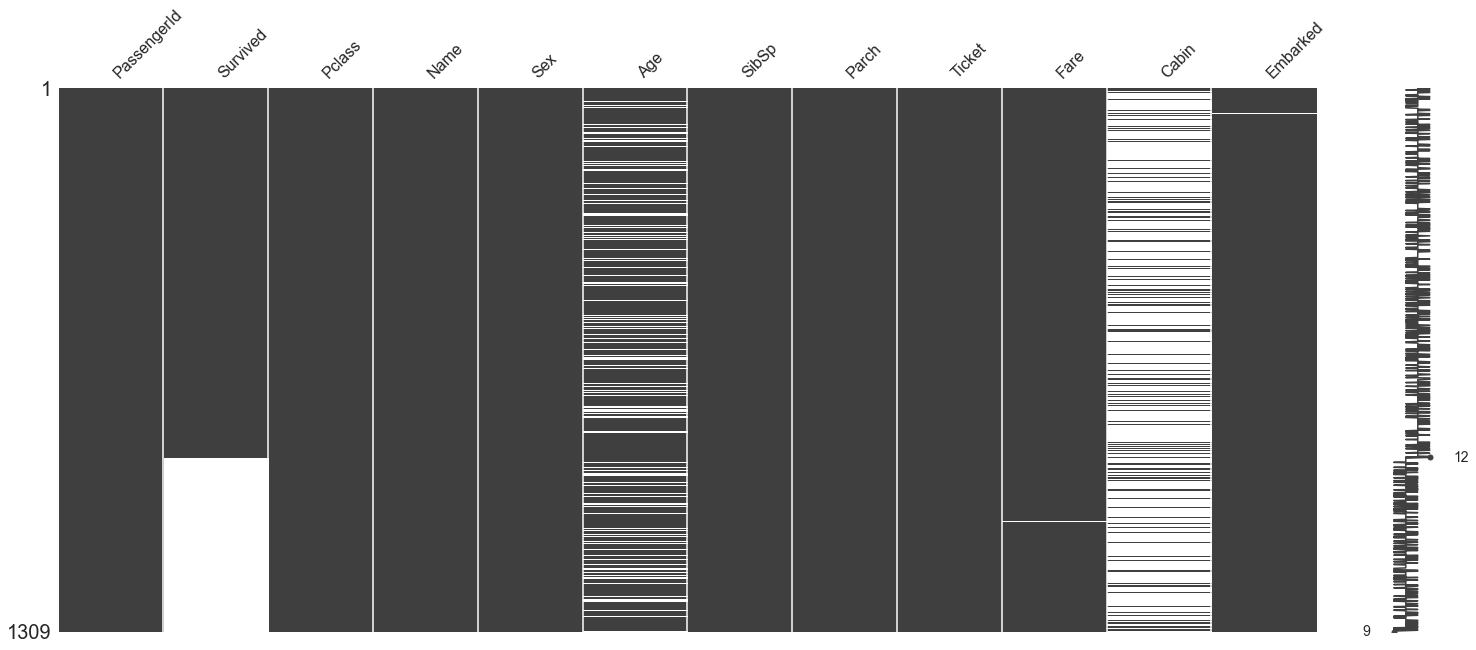

In [15]:
msno.matrix(titanic)
plt.show()

In [16]:
titanic.drop("Cabin",axis=1,inplace=True)  

#### 3.1."Fare" variable missing values

In [17]:
titanic[titanic["Fare"].isnull()]   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [18]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


[]

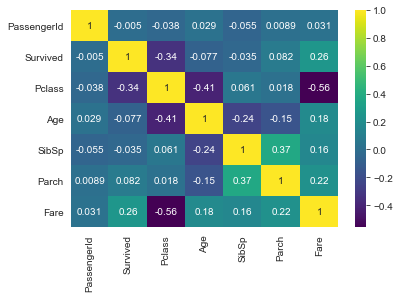

In [19]:
sns.heatmap(titanic.corr(),annot=True,cmap="viridis")
plt.plot()

In [20]:
titanic[(titanic["Pclass"]==3) & (titanic["Embarked"]=="S") & (titanic["Sex"]=="male")]["Fare"].mean()

13.145977260273972

In [21]:
titanic["Fare"].fillna(13.145977,inplace=True)   

#### 3.2."Embarked" variable missing values

In [22]:
titanic[titanic["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [23]:
titanic.groupby(["Embarked","Sex","Survived"])["Fare"].mean()

Embarked  Sex     Survived
C         female  0.0         16.215278
                  1.0         83.460286
          male    0.0         38.065342
                  1.0         71.468545
Q         female  0.0         10.904633
                  1.0         13.211733
          male    0.0         13.911732
                  1.0         12.916667
S         female  0.0         25.728508
                  1.0         44.596518
          male    0.0         19.881281
                  1.0         30.366286
Name: Fare, dtype: float64

In [24]:
titanic["Embarked"].fillna("C",inplace=True)
titanic[titanic["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


#### 3.3."Age" variable missing values

In [25]:
titanic[titanic["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


Let's look at the results we found by examining the graphs with statistical tests.
To fill the "age" variable: there must be a difference in terms of the distribution of the exeic values. With the Chi square test
Let's test which categorical variables provide this.

In [26]:
testKolon='Age'
for column in titanic.select_dtypes(exclude=["number","bool_"]).columns :
    
        crosstab = pd.crosstab(titanic[column], titanic[testKolon])
        
        chi_square_value,pval,degrees_of_freedom,table=stats.chi2_contingency(crosstab)  
        print(column,testKolon)
        print('chi_square_value : ',chi_square_value,'\np value : ',pval)
        print('degrees of freedom : ',degrees_of_freedom,'\n')
        if pval <0.05:
            print("H0 hypothesis is rejected. There is a difference in terms of the distribution of missing values.\n")
        else:
            print("H0 hypothesis is accepted. There is no difference in terms of the distribution of missing values.\n")
    


Name Age
chi_square_value :  101122.96220930234 
p value :  0.5419418717082447
degrees of freedom :  101171 

H0 hypothesis is accepted. There is no difference in terms of the distribution of missing values.

Sex Age
chi_square_value :  104.30512195464367 
p value :  0.2879255489404147
degrees of freedom :  97 

H0 hypothesis is accepted. There is no difference in terms of the distribution of missing values.

Ticket Age
chi_square_value :  68648.86902280654 
p value :  0.9999999993171654
degrees of freedom :  70907 

H0 hypothesis is accepted. There is no difference in terms of the distribution of missing values.

Embarked Age
chi_square_value :  236.02584949481212 
p value :  0.02119322899354614
degrees of freedom :  194 

H0 hypothesis is rejected. There is a difference in terms of the distribution of missing values.



It can be seen that among the categorical variables, only the "Embarked" variable has a significant difference on the "Age" variable.

Examining the effect of variables on "Age" variable distribution : 

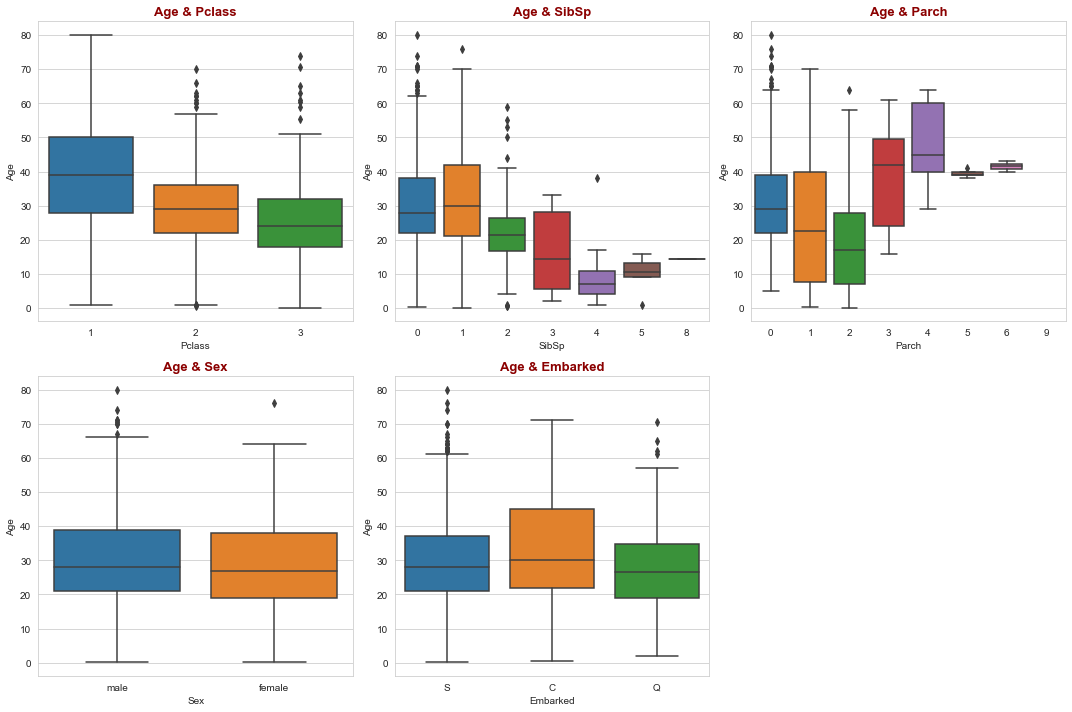

In [27]:
gruplar = ["Pclass","SibSp","Parch","Sex","Embarked"]
plt.figure(figsize=(15,10))
for i in range(0,len(gruplar)):
    plt.subplot(2,3,i+1)
    sns.boxplot(gruplar[i],"Age",data=titanic)
    plt.title("Age & "+ gruplar[i],fontdict=baslik_font)
    plt.tight_layout()
plt.show()   

When both the graphs and the correlation matrix are examined:
There is a significant difference between the continuous variables "Pclass", "SibSp", "Parch" variables on the "Age" variable.
Then we will use "Embarked", "Pclass", "SibSp" and "Parch" variables while filling the NaN values of the "Age" variable.

In [28]:
null_age = list(titanic[titanic["Age"].isnull()].index)

In [29]:
for i in null_age:                                                              
    age_deger = titanic[(titanic["Embarked"] == titanic["Embarked"].iloc[i]) &   
            (titanic["Pclass"] == titanic["Pclass"].iloc[i])&                  
            (titanic["SibSp"] == titanic["SibSp"].iloc[i]) &
            (titanic["Parch"] == titanic["Parch"].iloc[i])]["Age"].mean()
    
    if np.isnan(titanic["Age"].iloc[i])==True:
        
        titanic["Age"].iloc[i]=age_deger
        
        continue
    
titanic[titanic["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
46,47,0.0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,Q
48,49,0.0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,C
109,110,1.0,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,Q
186,187,1.0,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,Q
214,215,0.0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,Q


19 unfilled values left. Let's remove the EmBarked and Parch variables and fill in the remaining deficiencies.

In [30]:
for i in null_age:
    age1_deger = titanic[(titanic["Pclass"] == titanic["Pclass"].iloc[i])&
            (titanic["SibSp"] == titanic["SibSp"].iloc[i])]["Age"].mean()
    
    if np.isnan(titanic["Age"].iloc[i])==True:
        
        titanic["Age"].iloc[i]=age1_deger
        
        continue
    
titanic[titanic["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


 Filling in missing observations completed.

In [31]:
titanic.isnull().sum()   

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

#### Get Dummies

This method converts the categorical variable to dummy variables to further examine the variables. Let's convert the Sex and Name categorical variables.

In [32]:
df_dummy = pd.get_dummies(titanic["Sex"],drop_first=True)
titanic = pd.concat([titanic,df_dummy],axis=1)
titanic.drop(["Sex"],axis=1,inplace=True)

In [33]:
titanic.rename(columns = {'male': 'Sex'}, inplace = True)


for sex column ;

1:male

0:female

In [34]:
titanic["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina', ..., 'Saether, Mr. Simon Sivertsen',
       'Ware, Mr. Frederick', 'Peter, Master. Michael J'], dtype=object)

In [35]:
titanic["Title"] = titanic["Name"].str.extract(' ([A-Za-z]+)\.', expand=False) 

In [36]:
titanic["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Dona          1
Countess      1
Sir           1
Don           1
Capt          1
Lady          1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

Mr : 0

Miss : 1
    
Mrs : 2
    
Others : 3

In [37]:
title = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

titanic["Title"] = titanic["Title"].map(title)

In [38]:
titanic.drop("Name",axis=1,inplace=True)

In [39]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex,Title
0,1,0.0,3,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1.0,1,38.0,1,0,PC 17599,71.2833,C,0,2
2,3,1.0,3,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1.0,1,35.0,1,0,113803,53.1000,S,0,2
4,5,0.0,3,35.0,0,0,373450,8.0500,S,1,0


#### Outlier Detection

Let's examine which variables have outlier values.

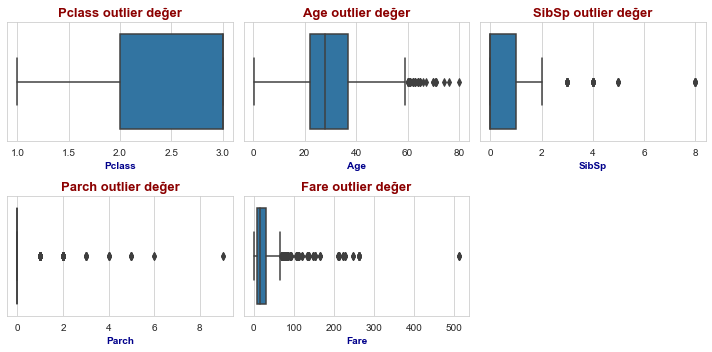

In [40]:
features = ["Pclass","Age","SibSp","Parch","Fare"]
plt.figure(figsize=(10,5))

for i in range(0,len(features)):
    plt.subplot(2,3,i+1)
    sns.boxplot(features[i],data=titanic)
    plt.title(features[i]+" outlier değer",fontdict=baslik_font)
    plt.xlabel(features[i],fontdict=eksen_font)
    plt.tight_layout()
    
plt.show()

In [41]:
def sürekli(var):
    
    print("********************")
    print("{} değişkeni için: ".format(var),"\n")
    
    plt.hist(titanic[var],bins=40,color="g")
    plt.title(var,fontdict=baslik_font)
    plt.xlabel(var,c="purple")
    plt.ylabel("frequency",c="purple")
    
    plt.show()

********************
Age değişkeni için:  



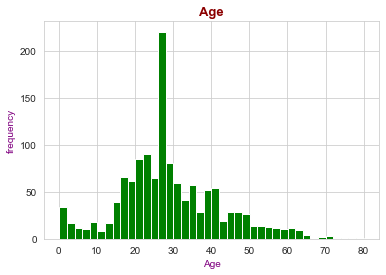

********************
Fare değişkeni için:  



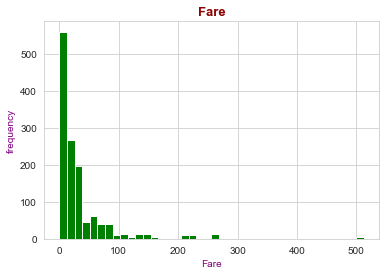

In [42]:
sürekli_list  = ["Age","Fare"]

for i in sürekli_list:
    sürekli(i)

For Age and Fare variables before applying outlier values
There are a few values greater than 70 for the age variable.
We see the 500 value for the mouse variable, which is quite different from the others.
Let's apply a few steps to these now

number of outlier of each variable:

In [43]:
outlier_var = pd.DataFrame() 
variables = ["Pclass","Age","SibSp","Parch","Fare"]    
for var in titanic[variables]:
    
    q75,q25 = np.percentile(titanic[var],[75,25])
    IQR = q75 - q25
    max_value = q75 + (IQR*1.5)
    min_value = q25 - (IQR*1.5)
    number_of_outliers = len(np.where((titanic[var] > max_value) |
                                        (titanic[var] < min_value))[0])

    outlier_var=outlier_var.append({"number of outliers":number_of_outliers},ignore_index=True)
        
    
outlier_var.index = ["Pclass","Age","SibSp","Parch","Fare"] 
outlier_var

,number of outliers
Pclass,0.0
Age,40.0
SibSp,57.0
Parch,307.0
Fare,171.0


For "Age" variable:

In [44]:
def outlier(var):                                           
    q75,q25 = np.percentile(titanic[var],[75,25])           
    IQR = q75 - q25                                        
    max_deger = q75 + (IQR*1.5)
    min_deger = q25 - (IQR*1.5)
    aykiri_degerler = titanic[((titanic[var] > max_deger) |(titanic[var] < min_deger))]

    return aykiri_degerler
outlier("Age").head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex,Title
33,34,0.0,2,66.0,0,0,C.A. 24579,10.5000,S,1,0
54,55,0.0,1,65.0,0,1,113509,61.9792,C,1,0
96,97,0.0,1,71.0,0,0,PC 17754,34.6542,C,1,0
116,117,0.0,3,70.5,0,0,370369,7.7500,Q,1,0
170,171,0.0,1,61.0,0,0,111240,33.5000,S,1,0


I equated lines older than 70 to 70

In [45]:
df_age=titanic["Age"]
df_age[df_age >70]=70

In [46]:
titanic[titanic["Age"]>70]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex,Title


For "Fare" variable:

In [47]:
outlier("Fare").head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex,Title
1,2,1.0,1,38.000000,1,0,PC 17599,71.2833,C,0,2
27,28,0.0,1,19.000000,3,2,19950,263.0000,S,1,0
31,32,1.0,1,39.647059,1,0,PC 17569,146.5208,C,0,2
34,35,0.0,1,28.000000,1,0,PC 17604,82.1708,C,1,0
52,53,1.0,1,49.000000,1,0,PC 17572,76.7292,C,0,2


For the mouse variable, I equated those greater than 300 to 300

In [48]:
outlier_fare = outlier("Fare")
mean = outlier_fare[outlier_fare["Fare"] > 200]["Fare"].mean()
df_fare=titanic["Fare"]          
df_fare[df_fare >300]=300

In [49]:
titanic[titanic["Fare"] > 300]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex,Title


### 4.Exploring the Data

### 4.1.Univariate Analysis

#### 4.1.1. Analysis of the Categorical Variables

In [50]:
def category(var):
    
    print("********************")
    print("for {} variable: ".format(var),"\n")
    print(titanic[var].value_counts())
        
    sns.countplot(titanic[var])
    plt.title(var+" variable graph",fontdict=baslik_font)
    plt.xlabel(var,fontdict=eksen_font)
    plt.ylabel("count",fontdict=eksen_font)
    
    plt.show()

********************
for Survived variable:  

0.0    549
1.0    342
Name: Survived, dtype: int64


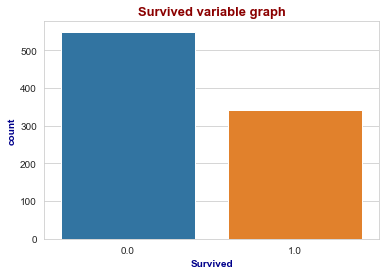

********************
for Pclass variable:  

3    709
1    323
2    277
Name: Pclass, dtype: int64


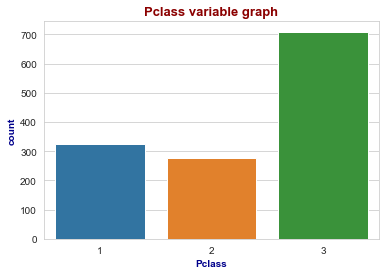

********************
for Sex variable:  

1    843
0    466
Name: Sex, dtype: int64


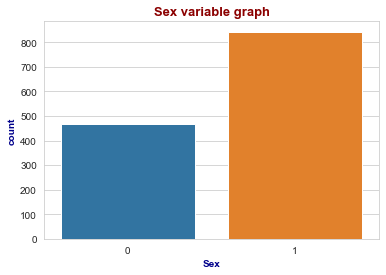

********************
for SibSp variable:  

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


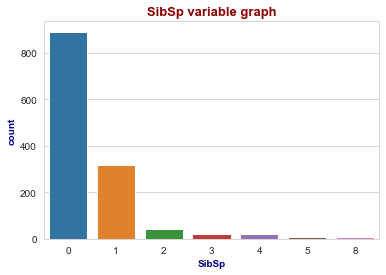

********************
for Parch variable:  

0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parch, dtype: int64


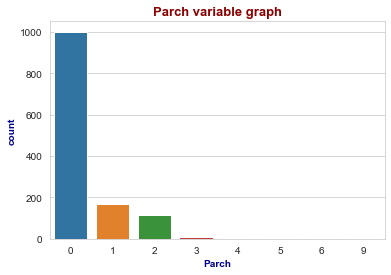

********************
for Embarked variable:  

S    914
C    272
Q    123
Name: Embarked, dtype: int64


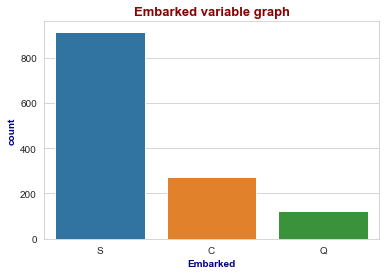

In [51]:
category_list  = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

for i in category_list:
    category(i)

for categorical variables:

1.chart : percentage of survivors 38.38%

2.chart : Most of the passengers travel in 3rd grade.54% of them are 3rd class

3.chart : male passengers in the majority. 64% of all passengers

4.chart : Passengers traveling without a sibling or spouse are in the majority

5.chart : Those who travel without a parent or children are in the majority

6.chart : Passengers arriving from the port of Southampton cover 69.8% of all passengers

#### 4.1.2. Analysis of the Continues Variables

In [52]:
def sürekli(var):
    
    print("********************")
    print("for {} variable : ".format(var),"\n")
    print(var+" mean {}: ".format(titanic[var].mean()))
    
    plt.hist(titanic[var],bins=40,color="g")
    plt.title(var+" variable graph",fontdict=baslik_font)
    plt.xlabel(var,c="purple")
    plt.ylabel("frequency",c="purple")
    
    plt.show()

********************
for Age variable :  

Age mean 29.459665662390055: 


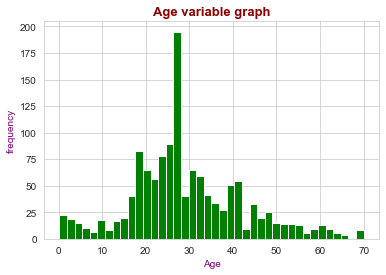

********************
for Fare variable :  

Fare mean 32.63125750725745: 


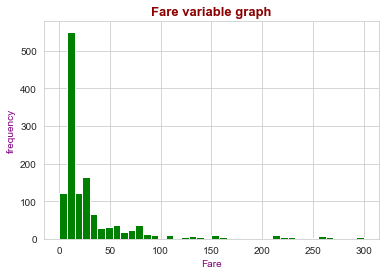

In [53]:
sürekli_list  = ["Age","Fare"]

for i in sürekli_list:
    sürekli(i)

for continuous variables:


1.histogram : We see that the majority see 29-30 for the age variable. After processing the outlier values, we see that those over 70 see together with 70.

2.histogram : we see that the average for ticket fares is 32.63

### 4.2.Multivariate Analysis

#### 4.2.1.Bivariate Analysis of Two Continuous Variables

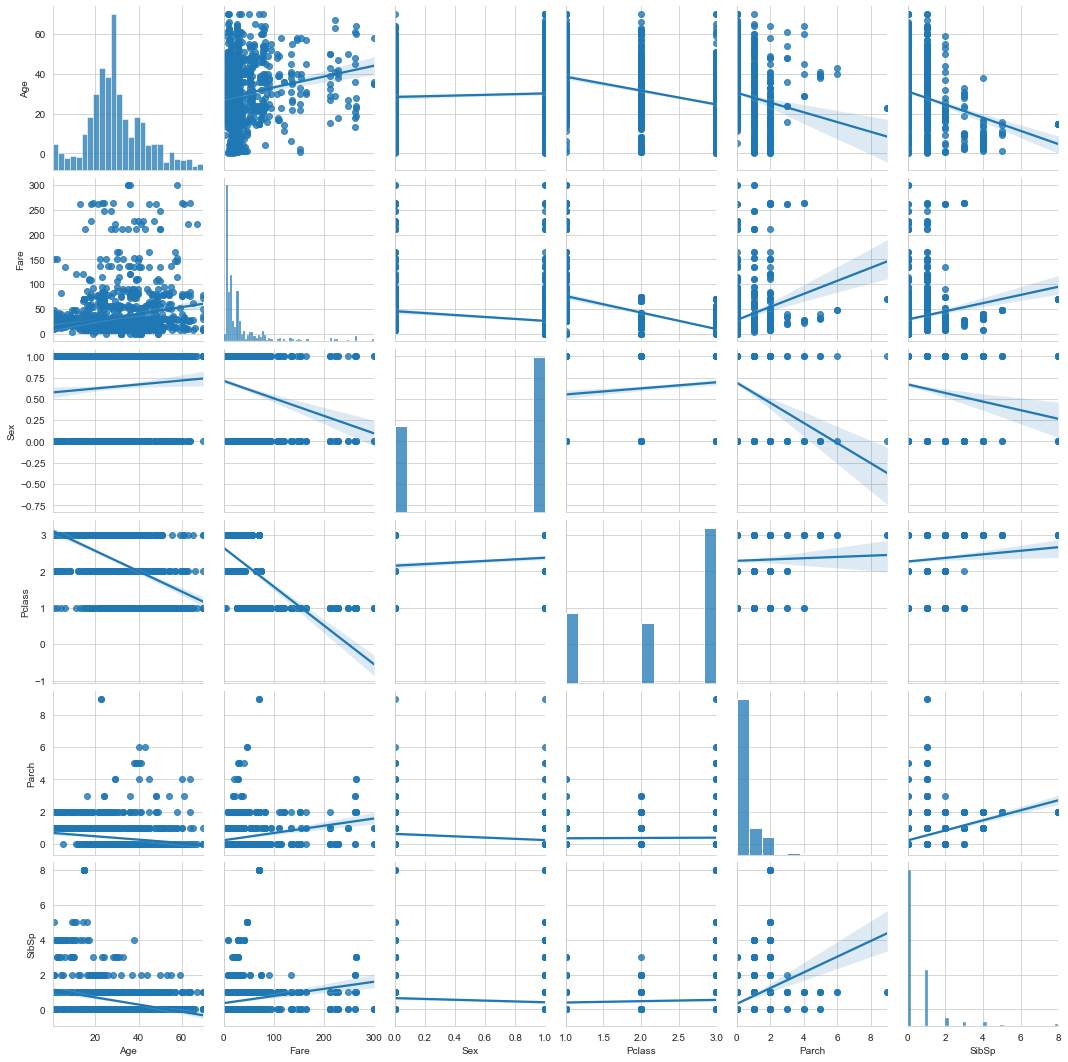

In [54]:
sns.pairplot(titanic,
    x_vars=["Age","Fare","Sex","Pclass","Parch","SibSp"],
    y_vars=["Age","Fare","Sex","Pclass","Parch","SibSp"],
kind="reg")

If we examine the graphics:

Age-Fare : We can say the age with the fare  is linear. As the age of the passengers increased, the ticket fees have also increased.

Age-Pclass : Accordingly, as the age increases, the classes in which passengers travel approached 1.

Age-Parch/SibSp : As the age of the passengers increased, the rates of single travel increased

Fare-Pclass : As the class of travel approached the first year, the ticket fares also increased.

Sex-Fare : Ticket fees paid by women are higher than men


#### 4.2.2.Bivariate Analysis of the Continuous and Categorical Variables

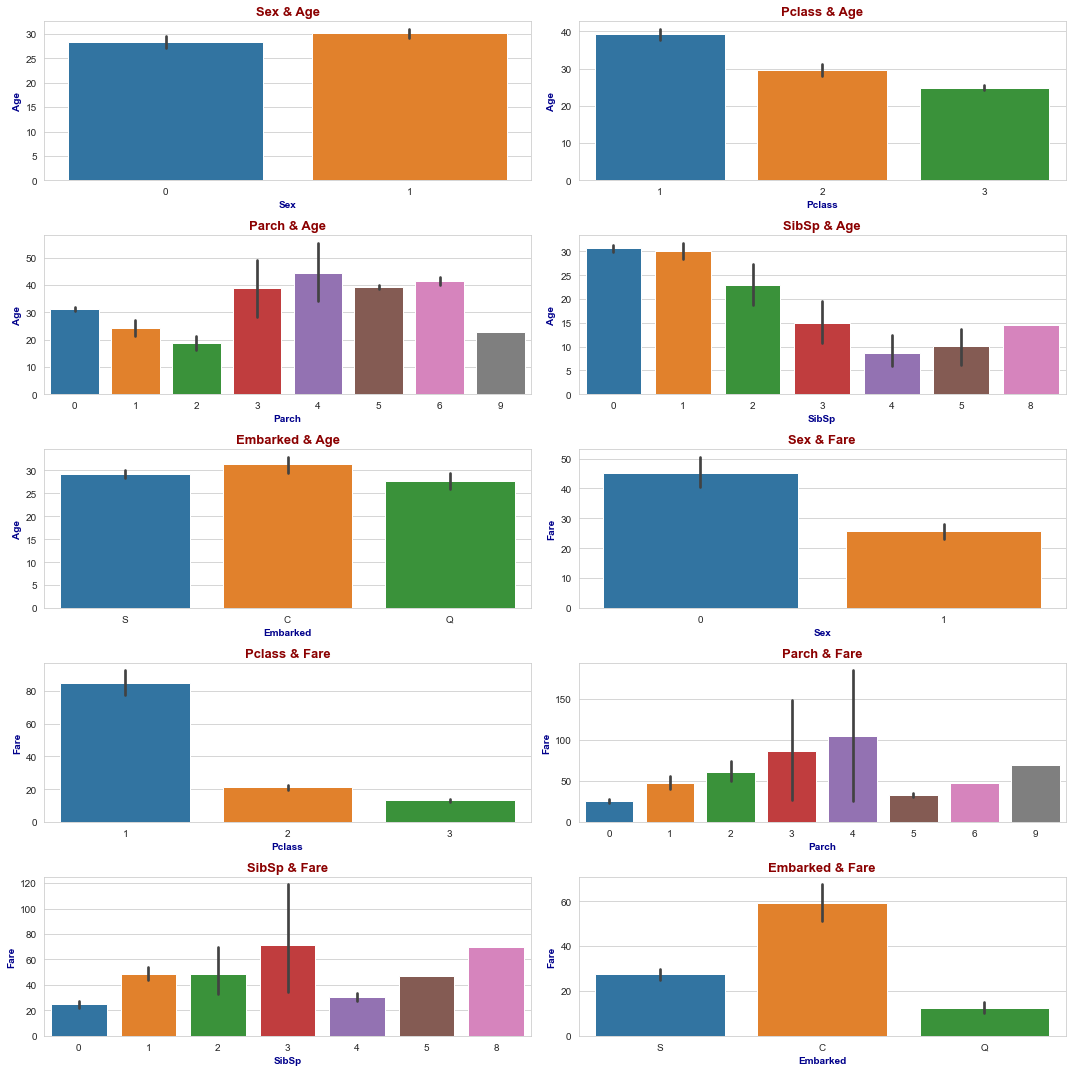

In [55]:
plt.figure(figsize=(15,15))
variables = ["Sex","Pclass","Parch","SibSp","Embarked"]

for i in range(0,len(variables)):
    
    plt.subplot(5,2,i+1)
    sns.barplot(titanic[variables[i]],"Age",data=titanic)
    plt.title(variables[i]+" & Age",fontdict=baslik_font)
    plt.xlabel(variables[i],fontdict=eksen_font)
    plt.ylabel("Age",fontdict=eksen_font)
    
    plt.subplot(5,2,i+6)
    sns.barplot(titanic[variables[i]],"Fare",data=titanic)
    plt.title(variables[i]+" & Fare",fontdict=baslik_font)
    plt.xlabel(variables[i],fontdict=eksen_font)
    plt.ylabel("Fare",fontdict=eksen_font)
    
    plt.tight_layout()
plt.show()

### 4.2.3.Focusing on the Target Variable

#### 4.2.3.1.Effect of categorical variables on target variable

In [56]:
titanic1 = titanic[:890]

#### Sex & Survived

The effect of Sex on Survived variable
Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64


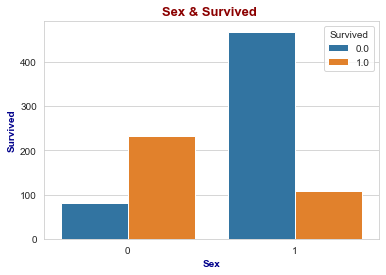

In [57]:
print("The effect of Sex on Survived variable")
print(titanic.groupby("Sex")["Survived"].mean())
sns.countplot(x=titanic["Sex"], hue=titanic["Survived"])
plt.title("Sex & Survived ",fontdict=baslik_font)
plt.xlabel("Sex",fontdict=eksen_font)
plt.ylabel("Survived",fontdict=eksen_font)
plt.show()

In [58]:
test_col = titanic1["Sex"].unique()
comparison = pd.DataFrame(columns=['group_1', 'group_2','statics', 'p_value'])
print("Ttest for Sex",end='')
for i in range(0,len(test_col)):
    
    for j in range(i+1, len(test_col)):
        
        ttest = stats.ttest_ind(titanic1[titanic1["Sex"]==test_col[i]]["Survived"], 
                                titanic1[titanic1["Sex"]==test_col[j]]["Survived"])
        group_1 = test_col[i]
        group_2 = test_col[j]
        statics = ttest[0]
        p_value = ttest[1]
        
        comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statics": statics , 
                                                  "p_value" : p_value}, ignore_index=True)
display(comparison)    

Ttest for Sex

,group_1,group_2,statics,p_value
0,1.0,0.0,-19.27195,2.056160e-69



By looking at both the graph and the statistical test, we can say that gender definitely affects the survived variable. Whether passengers are male or female makes a difference to their survival. Female passengers are much more likely to survive. Female survival rate is 74%, while male survival rate is 18%.

#### Pclass & Survived

The effect of Pclass on Survived variable
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


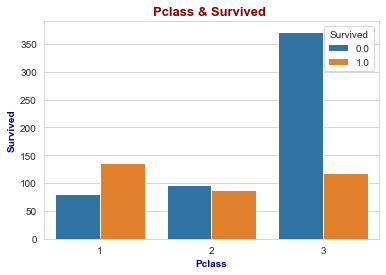

In [59]:
print("The effect of Pclass on Survived variable")
print(titanic.groupby("Pclass")["Survived"].mean())
sns.countplot(x=titanic["Pclass"], hue=titanic["Survived"])
plt.title("Pclass & Survived ",fontdict=baslik_font)
plt.xlabel("Pclass",fontdict=eksen_font)
plt.ylabel("Survived",fontdict=eksen_font)
plt.show()

In [60]:
test_col = titanic1["Pclass"].unique()
comparison = pd.DataFrame(columns=['group_1', 'group_2','statics', 'p_value'])
print("Ttest for Pclass",end='')
for i in range(0,len(test_col)):
    
    for j in range(i+1, len(test_col)):
        
        ttest = stats.ttest_ind(titanic1[titanic1["Pclass"]==test_col[i]]["Survived"], 
                                titanic1[titanic1["Pclass"]==test_col[j]]["Survived"])
        group_1 = test_col[i]
        group_2 = test_col[j]
        statics = ttest[0]
        p_value = ttest[1]
        
        comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statics": statics , 
                                                  "p_value" : p_value}, ignore_index=True)
display(comparison)
    

Ttest for Pclass

,group_1,group_2,statics,p_value
0,3.0,1.0,-10.601617,1.826411e-24
1,3.0,2.0,-5.913147,5.341718e-09
2,1.0,2.0,3.178614,1.595466e-03



While the vast majority of passengers travel in the 3rd grade, the survival rate of those traveling in the 1st class is the highest. When we look at the statistical test, we see that there is a significant difference between classes.
Therefore, another important variable affecting the survived variable is Pclass.


#### Embarked & Survived

The effect of Embarked on Survived variable
Embarked
C    0.558824
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


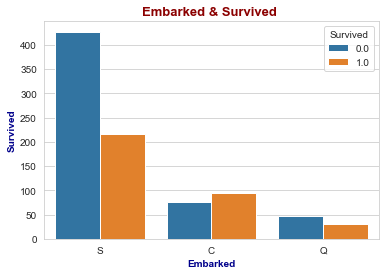

In [61]:
print("The effect of Embarked on Survived variable")
print(titanic.groupby("Embarked")["Survived"].mean())
sns.countplot(x=titanic["Embarked"], hue=titanic["Survived"])
plt.title("Embarked & Survived ",fontdict=baslik_font)
plt.xlabel("Embarked",fontdict=eksen_font)
plt.ylabel("Survived",fontdict=eksen_font)
plt.show()

In [62]:
test_col = titanic1["Embarked"].unique()
comparison = pd.DataFrame(columns=['group_1', 'group_2','statics', 'p_value'])
print("Ttest for Embarked",end='')
for i in range(0,len(test_col)):
    
    for j in range(i+1, len(test_col)):
        
        ttest = stats.ttest_ind(titanic1[titanic1["Embarked"]==test_col[i]]["Survived"], 
                                titanic1[titanic1["Embarked"]==test_col[j]]["Survived"])
        group_1 = test_col[i]
        group_2 = test_col[j]
        statics = ttest[0]
        p_value = ttest[1]
        
        comparison = comparison.append({"group_1" : group_1 ,
                                                  "group_2" : group_2 ,
                                                  "statics": statics , 
                                                  "p_value" : p_value}, ignore_index=True)
display(comparison)

Ttest for Embarked

,group_1,group_2,statics,p_value
0,S,C,-5.379132,9.795448e-08
1,S,Q,-1.002806,3.162925e-01
2,C,Q,2.396649,1.729922e-02


The survival probability of passengers arriving from the port of Cherbourg appears to be higher, but when we look at the statistical test, we cannot say that there is a difference between Queenstown port and Southampton port, so it cannot be said that it has a great effect on the survived variable.

#### 4.2.4.2.Effect of continues variables on target variable

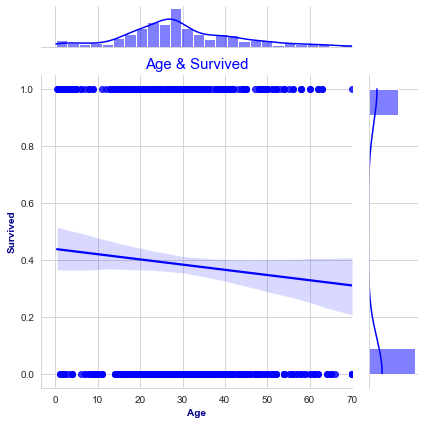

In [63]:
sns.jointplot("Age","Survived",data=titanic,kind="reg",color="b")
plt.title("Age & Survived",c="b",size=15)
plt.xlabel("Age",fontdict=eksen_font)
plt.ylabel("Survived",fontdict=eksen_font)
plt.tight_layout()
plt.show()

When we look at the graph, we see that the negligence of survival decreases as the age increases.

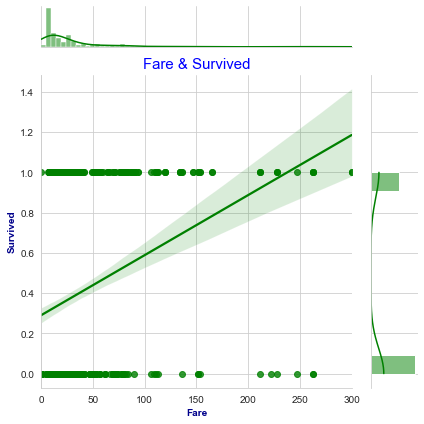

In [64]:
sns.jointplot("Fare","Survived",data=titanic1,kind="reg",color="g")
plt.title("Fare & Survived",c="b",size=15)
plt.xlabel("Fare",fontdict=eksen_font)
plt.ylabel("Survived",fontdict=eksen_font)
plt.tight_layout()
plt.show()

the higher the fare the more the survival rate is

#### Get dummies for Embarked

Now let's convert the embarked categoric variable to a numerical variable for convenience in terms of corelation.

In [65]:
df_dummy = pd.get_dummies(titanic["Embarked"],drop_first=True)
titanic = pd.concat([titanic,df_dummy],axis=1)


In [66]:
titanic.drop(["Embarked"],axis=1,inplace=True)

In [67]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Title,Q,S
PassengerId,1.000000,-0.005007,-0.038354,0.021724,-0.055224,0.008942,0.031696,0.013406,0.007191,0.011585,-0.047923
Survived,-0.005007,1.000000,-0.338481,-0.050198,-0.035322,0.081629,0.270169,-0.543351,0.445792,0.003650,-0.155660
Pclass,-0.038354,-0.338481,1.000000,-0.440032,0.060832,0.018322,-0.595934,0.124617,-0.144847,0.230491,0.096335
Age,0.021724,-0.050198,-0.440032,1.000000,-0.260142,-0.159918,0.192359,0.064580,-0.127744,-0.044052,-0.035832
SibSp,-0.055224,-0.035322,0.060832,-0.260142,1.000000,0.373587,0.183838,-0.109609,0.282057,-0.048678,0.075198
Parch,0.008942,0.081629,0.018322,-0.159918,0.373587,1.000000,0.243075,-0.213125,0.329313,-0.100943,0.073258
Fare,0.031696,0.270169,-0.595934,0.192359,0.183838,0.243075,1.000000,-0.201025,0.184905,-0.139133,-0.169905
Sex,0.013406,-0.543351,0.124617,0.064580,-0.109609,-0.213125,-0.201025,1.000000,-0.570809,-0.088651,0.119504
Title,0.007191,0.445792,-0.144847,-0.127744,0.282057,0.329313,0.184905,-0.570809,1.000000,-0.003331,-0.073243
Q,0.011585,0.003650,0.230491,-0.044052,-0.048678,-0.100943,-0.139133,-0.088651,-0.003331,1.000000,-0.489874


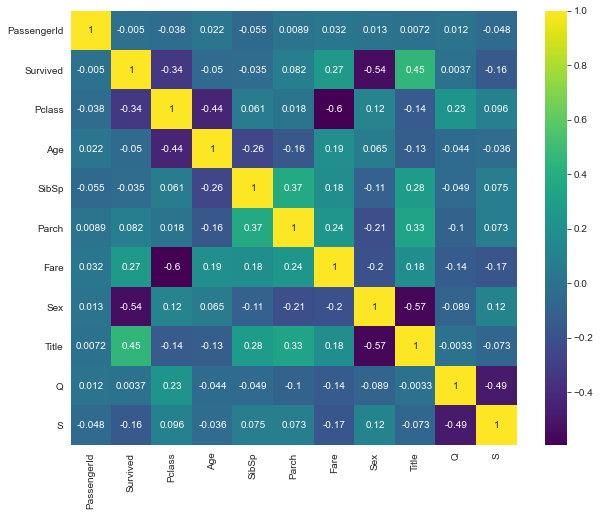

In [68]:
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(),annot=True,cmap="viridis")
plt.show()


Before examining the correlation between survived variable and other variables: let's examine which variables have high correlation with each other.

-Pclass-Fare : These two variables provide a high correlation with 0.6. something we don't want much in terms of this model. When we want to determine the variables that affect the goal variable, we should not take either one.



Let's list the variables that have the highest correlation with the survivor variable. This will guide us about this which variables are more important to us.

In [69]:
t_corr = titanic.corr().Survived.abs().sort_values(ascending=False).index[0:8]
titanic[t_corr].corr().Survived

Survived    1.000000
Sex        -0.543351
Title       0.445792
Pclass     -0.338481
Fare        0.270169
S          -0.155660
Parch       0.081629
Age        -0.050198
Name: Survived, dtype: float64

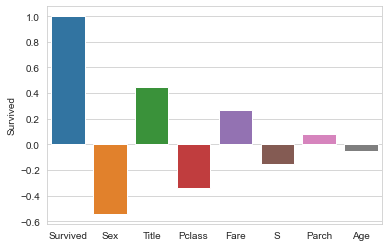

In [70]:
sns.barplot(x=t_corr,y=titanic[t_corr].corr().Survived)
plt.show()

### 5.Future Engineering

### Ttest

In [71]:
titanic1 = titanic[:890]

In [72]:
ttest_sa = stats.ttest_ind(titanic1["Survived"], titanic1["Age"])
ttest_sf = stats.ttest_ind(titanic1["Survived"], titanic1["Fare"])
ttest_ss = stats.ttest_ind(titanic1["Survived"], titanic1["S"])
ttest_sq = stats.ttest_ind(titanic1["Survived"], titanic1["Q"])
ttest_ssex = stats.ttest_ind(titanic1["Survived"], titanic1["Sex"])
ttest_sp = stats.ttest_ind(titanic1["Survived"], titanic1["Pclass"])
ttest_ssib = stats.ttest_ind(titanic1["Survived"], titanic1["SibSp"])
ttest_spa = stats.ttest_ind(titanic1["Survived"], titanic1["Parch"])
print("SA {}\n SF {}\n SS {}\n SQ {}\n SSEX {}\n SP {}\n SSİB {}\n SPA {}\n"
      .format(ttest_sa,ttest_sf,ttest_ss,ttest_sq,ttest_ssex,ttest_sp,ttest_ssib,ttest_spa))

SA Ttest_indResult(statistic=-64.630805355017, pvalue=0.0)
 SF Ttest_indResult(statistic=-21.111159241367453, pvalue=1.8486461828222844e-88)
 SS Ttest_indResult(statistic=-15.311587205535487, pvalue=8.330263487789261e-50)
 SQ Ttest_indResult(statistic=15.88505778949544, pvalue=3.087729769974599e-53)
 SSEX Ttest_indResult(statistic=-11.496818379211476, pvalue=1.4742622518138756e-29)
 SP Ttest_indResult(statistic=-59.31155794779217, pvalue=0.0)
 SSİB Ttest_indResult(statistic=-3.4470543349818423, pvalue=0.0005799275369330484)
 SPA Ttest_indResult(statistic=0.0711757607761722, pvalue=0.9432658772635558)



We can use Jarque-Bera and Normal tests to see if they follow the normal distribution.

In [73]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format

variables = ["Sex", "Pclass", "Fare","S","Parch"]
distribution_tests = pd.DataFrame(columns=['var', 'jarque_bera_stats', 'jarque_bera_p_value', 
                                         'normal_stats', 'normal_p_value'])

for var in variables:
    jb_stats = jarque_bera(titanic[var])
    norm_stats = normaltest(titanic[var])
    distribution_tests = distribution_tests.append({"var": var,
                                                "jarque_bera_stats" : jb_stats[0] ,
                                                "jarque_bera_p_value" : jb_stats[1] ,
                                                "normal_stats": norm_stats[0] , 
                                                "normal_p_value" : norm_stats[1]
                                               }, ignore_index=True)
distribution_tests

,var,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,Sex,225.30615,0.00000,6758.60568,0.00000
1,Pclass,172.27041,0.00000,4277.70605,0.00000
2,Fare,9491.52394,0.00000,901.92870,0.00000
3,S,248.52733,0.00000,1796.95904,0.00000
4,Parch,28035.09328,0.00000,1068.70808,0.00000


There is no normal distribution because the pvalue is less than 0.05.

### PCA

In [74]:
titanic_df =titanic.copy()
titanic_df.drop(columns=["Survived","Title","Ticket"],inplace=True)
titanic_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,1,3,22.00000,1,0,7.25000,1,0,1
1,2,1,38.00000,1,0,71.28330,0,0,0
2,3,3,26.00000,0,0,7.92500,0,0,1
3,4,1,35.00000,1,0,53.10000,0,0,1
4,5,3,35.00000,0,0,8.05000,1,0,1


In [75]:
X = titanic_df.values

In [76]:
X = StandardScaler().fit_transform(titanic_df)
pca = PCA(n_components=7)
principalComponents=pca.fit_transform(X)

exp_var= pca.explained_variance_ratio_
cumsum_var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(exp_var)
print(cumsum_var)

[0.21801341 0.19050269 0.1709051  0.11097913 0.09279397 0.07346781
 0.0649945 ]
[21.8  40.85 57.94 69.04 78.32 85.67 92.17]


This values show that the first principal component PC1 explains 21.80% of the variation in the original data while the second principal component PC2 explains 19.05% of the variation in the original data.

Text(0, 0.5, '% of Variance Explained')

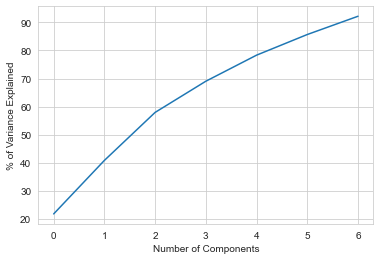

In [77]:
plt.plot(cumsum_var)
plt.xlabel('Number of Components')
plt.ylabel('% of Variance Explained')

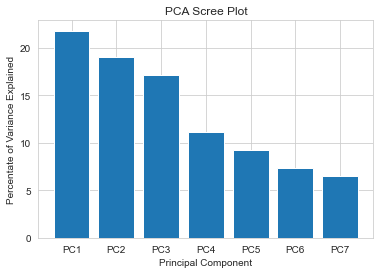

In [78]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7']
plt.bar(x= range(1,8), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Additionally, explained_variance_ plot can be used to visualize the contribution of the components to the explained variance by bar plot. This is exactly the same story with different visualization.

### 6.Results

We analyzed variables, applied graphical analysis and tests to understand the data, and analyzed the effect of all these on the target variable.

And we got some results:

-The variables Sex, Pclass,Fare ,S and Parch have the most impact on the survived variable.But if I need to choose from these variables, it can be misleading in terms of the model because the correlation between the Pclass and the Fare variables is high. Since the correlation between the Survived variable and the Pclass variable is higher, I ignore the Fare variable by choosing the Pclass variable.As a result, the variables I will choose will be Sex, Pclass, S and Parch variables.